In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
date = datetime.datetime.now()

def transfer_date(datestr):
    datestr = str(datestr).split(' ')[0].replace('-','')
    return datestr
def crawler(datestr):
    r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date='+datestr+'&type=ALLBUT0999')
    df = pd.read_csv(StringIO(r.text.replace('=','')), 
            header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)
    df = df.set_index('證券代號')
    return(df)

dict_stock = {}
datespan = 100
date_index = 0
# print(transfer_date(date-datetime.timedelta(days=date_index)))
while len(dict_stock) < datespan:
    time.sleep(5)
    now_date = transfer_date(date-datetime.timedelta(days=date_index))
    try:
        dict_stock.update({now_date
            :crawler(now_date)})
        # date_index+=1
        # print('sucessfull at'+' '+str(transfer_date(now_date)))
    except:
        print('Fails at'+' '+str(transfer_date(now_date)))
    date_index+=1

close = pd.DataFrame({k:d['收盤價'].apply(pd.to_numeric,errors='coerce') for k,d in dict_stock.items()}).transpose()
close.index = pd.to_datetime(close.index)
close = close.sort_index()

Fails at 20191201
Fails at 20191130
Fails at 20191124
Fails at 20191123
Fails at 20191117
Fails at 20191116
Fails at 20191110
Fails at 20191109
Fails at 20191103
Fails at 20191102
Fails at 20191027
Fails at 20191026
Fails at 20191020
Fails at 20191019
Fails at 20191013
Fails at 20191012
Fails at 20191011
Fails at 20191010
Fails at 20191006
Fails at 20191005
Fails at 20190930
Fails at 20190929
Fails at 20190928
Fails at 20190922
Fails at 20190921
Fails at 20190915
Fails at 20190914
Fails at 20190913
Fails at 20190908
Fails at 20190907
Fails at 20190901
Fails at 20190831
Fails at 20190825
Fails at 20190824
Fails at 20190818
Fails at 20190817
Fails at 20190811
Fails at 20190810
Fails at 20190809
Fails at 20190804
Fails at 20190803
Fails at 20190728
Fails at 20190727
Fails at 20190721
Fails at 20190720
Fails at 20190714
Fails at 20190713


In [4]:
close_ln = np.log(close)

In [5]:
close_ln

,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2019-07-11,4.417032,3.494384,4.016383,3.566712,3.120601,2.920470,3.299903,3.961765,3.850148,3.856510,...,3.496508,4.844187,3.985273,4.294561,4.203199,2.873565,3.751854,3.054001,2.985682,4.245634
2019-07-12,4.415824,3.494991,4.019980,3.566147,3.123246,2.922086,3.301745,3.959860,3.847378,3.857778,...,3.488903,4.848116,3.985273,4.295924,4.200205,2.876386,3.744787,3.051640,2.962692,4.242765
2019-07-15,4.421247,3.500741,4.028027,3.578786,3.119276,2.918851,3.303585,3.964615,3.850148,3.854606,...,3.478158,4.859812,3.985273,4.298645,4.201703,2.876386,3.737670,3.039749,2.962692,4.238445
2019-07-16,4.423049,3.505858,4.031582,3.578506,3.124125,2.917771,3.305420,3.969348,3.855029,3.855453,...,3.467297,4.852030,3.987130,4.317488,4.200205,2.876386,3.734092,3.044522,2.941804,4.304065
2019-07-17,4.416428,3.503453,4.025352,3.568123,3.122365,2.917230,3.301009,3.961765,3.848444,3.851636,...,3.465736,4.840242,3.988984,4.313480,4.200205,2.865054,3.722072,3.051640,2.909630,4.357990
2019-07-18,4.415220,3.501043,4.023564,3.568123,NaN,2.918851,3.298057,3.960813,3.845883,3.852485,...,3.467297,4.852030,3.988984,4.310799,4.200205,2.873565,3.728100,3.037354,2.952303,4.341205
2019-07-19,4.418841,3.505257,4.040416,3.580459,3.117950,2.919391,3.298057,3.972177,3.848018,3.854818,...,3.470412,4.859812,3.990834,4.304065,4.201703,2.879198,3.734092,3.042139,2.947067,4.371976
2019-07-22,4.423648,3.510351,4.053523,3.588783,3.122365,2.922086,3.299903,3.977811,3.851211,3.854606,...,3.467297,4.890349,3.990834,4.301359,4.201703,2.873565,3.742420,3.054001,2.941804,4.366913
2019-07-23,4.426044,3.511545,4.053523,3.593194,3.122805,2.920470,3.304686,3.977811,3.851636,3.856087,...,3.462606,4.882802,3.990834,4.304065,4.201703,2.862201,3.730501,3.072693,2.917771,4.369448
2019-07-24,4.425445,3.511545,4.055257,3.597312,NaN,2.914522,3.306154,3.978747,3.851848,3.855241,...,3.451574,4.753590,3.988984,4.308111,4.200205,2.856470,3.714791,3.128951,2.915064,4.379524


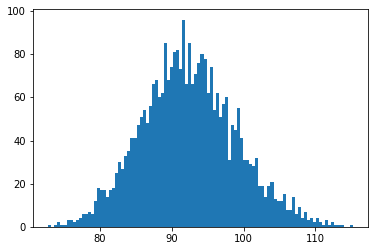

In [37]:
stock = '0050'
mean = (close_ln[stock].iloc[:-1]-close_ln[stock].iloc[:-1].shift()).mean()
sigma = (close_ln[stock].iloc[:-1]-close_ln[stock].iloc[:-1].shift()).std()
k = len(close_ln[stock].iloc[:-1])
normal_mean = mean*k+close_ln[stock].iloc[0]
normal_sigma = np.sqrt(k)*sigma
s = np.random.normal(normal_mean,normal_sigma, 3000)
s_new = np.exp(s)
plt.hist(s_new,bins=100)
plt.show()

In [15]:
close[stock].iloc[-1]

91.7

In [26]:
np.exp(normal_mean-normal_sigma),np.exp(normal_mean+normal_sigma)

(85.66754880205342, 99.1207401811442)

In [27]:
close[stock].iloc[-2]

92.05

In [53]:
s_new.mean()

92.39943163749771